In [ ]:
pip install kaggle # To install kaggle

In [ ]:
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification # Downloading the dataset from kaggle

Dataset URL: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification
License(s): ODbL-1.0
 99% 731M/736M [00:12<00:00, 43.0MB/s]
100% 736M/736M [00:12<00:00, 60.0MB/s]


In [ ]:
!unzip eye-diseases-classification.zip # Unzipping the dataset

Archive:  eye-diseases-classification.zip
  inflating: dataset/cataract/0_left.jpg  
  inflating: dataset/cataract/103_left.jpg  
  inflating: dataset/cataract/1062_right.jpg  
  inflating: dataset/cataract/1083_left.jpg  
  inflating: dataset/cataract/1084_right.jpg  
  inflating: dataset/cataract/1102_left.jpg  
  inflating: dataset/cataract/1102_right.jpg  
  inflating: dataset/cataract/1115_left.jpg  
  inflating: dataset/cataract/1126_right.jpg  
  inflating: dataset/cataract/112_right.jpg  
  inflating: dataset/cataract/1144_left.jpg  
  inflating: dataset/cataract/1144_right.jpg  
  inflating: dataset/cataract/1164_left.jpg  
  inflating: dataset/cataract/1167_right.jpg  
  inflating: dataset/cataract/119_left.jpg  
  inflating: dataset/cataract/1285_left.jpg  
  inflating: dataset/cataract/1415_left.jpg  
  inflating: dataset/cataract/1415_right.jpg  
  inflating: dataset/cataract/1435_left.jpg  
  inflating: dataset/cataract/1444_left.jpg  
  inflating: dataset/cataract/1452_l

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
# Importing necessary libraries

In [ ]:
data = []
result = []
def load_images(path):
    l1 = os.listdir(path)
#     print(l1)
    for i in l1:
        l2 = os.listdir(path+'/'+i)
        for j in l2:
            img = Image.open(path+i+'/'+j)
            img = img.resize(size=(256,256)) #resizing the image
            data.append(np.array(img))#storing each image in data list
            result.append(i)
    %matplotlib inline
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(5, 4, i+1)#plotting on a 5*4 grid
        plt.imshow(data[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(data),result

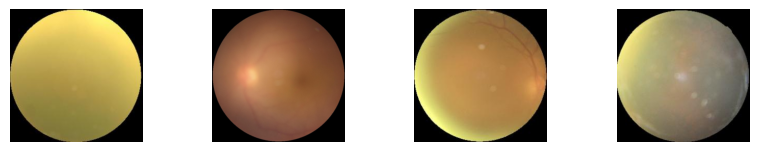

In [ ]:
data,result = load_images("/content/dataset/") #loading the dataset

In [ ]:
print(data)

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [ ]:
t = pd.Series(result,dtype='category').cat.codes #converting into numerical category codes

In [ ]:
t

,0
0,0
1,0
2,0
3,0
4,0
...,...
4212,1
4213,1
4214,1
4215,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive') # mounting my drive to colab's VM

Mounted at /content/drive


In [ ]:
data_dir = '/content/dataset'
def preprocess_image(image):
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        image = cv.resize(image, (224, 224))
    image = cv.GaussianBlur(image, (5, 5), 0)
    image = cv.equalizeHist(image)
    image = image / 255.0
    return image
# converting images into gray-scale and applying guassian blur (adding some noise to the image) and normalizing pixel range

In [ ]:
def load_and_preprocess_images(data_dir, img_size=(512, 512), batch_size=100):
    images = []
    labels = []
    categories = os.listdir(data_dir)
    total_images = 0
    for category in categories:
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):# loading each image from the subdirectory
            files = [f for f in os.listdir(category_path) if f.endswith(('.jpg', '.png'))]
            total_images += len(files)

    processed_images = 0
    for category in categories:
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            for i, file in enumerate(os.listdir(category_path)):
                if file.endswith('.jpg') or file.endswith('.png'):
                    image_path = os.path.join(category_path, file)
                    image = cv.imread(image_path)#clubbing them
                    image = cv.resize(image, img_size)
                    image = preprocess_image(image)
                    images.append(image)
                    labels.append(category)

                    processed_images += 1
                    if processed_images % batch_size == 0:
                        print(f"Processed {processed_images}/{total_images} images...")

                    # Yielding after every batch
                    if processed_images % batch_size == 0:
                        yield np.array(images), np.array(labels)
                        images, labels = [], []

    # Yield remaining images
    if images:
        yield np.array(images), np.array(labels)

In [ ]:
# Example usage:
for images_batch, labels_batch in load_and_preprocess_images(data_dir):
    # Process the batch here
    print(f"Batch size: {len(images_batch)}")


Processed 100/3119 images...
Batch size: 100
Processed 200/3119 images...
Batch size: 100
Processed 300/3119 images...
Batch size: 100
Processed 400/3119 images...
Batch size: 100
Processed 500/3119 images...
Batch size: 100
Processed 600/3119 images...
Batch size: 100
Processed 700/3119 images...
Batch size: 100
Processed 800/3119 images...
Batch size: 100
Processed 900/3119 images...
Batch size: 100
Processed 1000/3119 images...
Batch size: 100
Processed 1100/3119 images...
Batch size: 100
Processed 1200/3119 images...
Batch size: 100
Processed 1300/3119 images...
Batch size: 100
Processed 1400/3119 images...
Batch size: 100
Processed 1500/3119 images...
Batch size: 100
Processed 1600/3119 images...
Batch size: 100
Processed 1700/3119 images...
Batch size: 100
Processed 1800/3119 images...
Batch size: 100
Processed 1900/3119 images...
Batch size: 100
Processed 2000/3119 images...
Batch size: 100
Processed 2100/3119 images...
Batch size: 100
Processed 2200/3119 images...
Batch size: 1

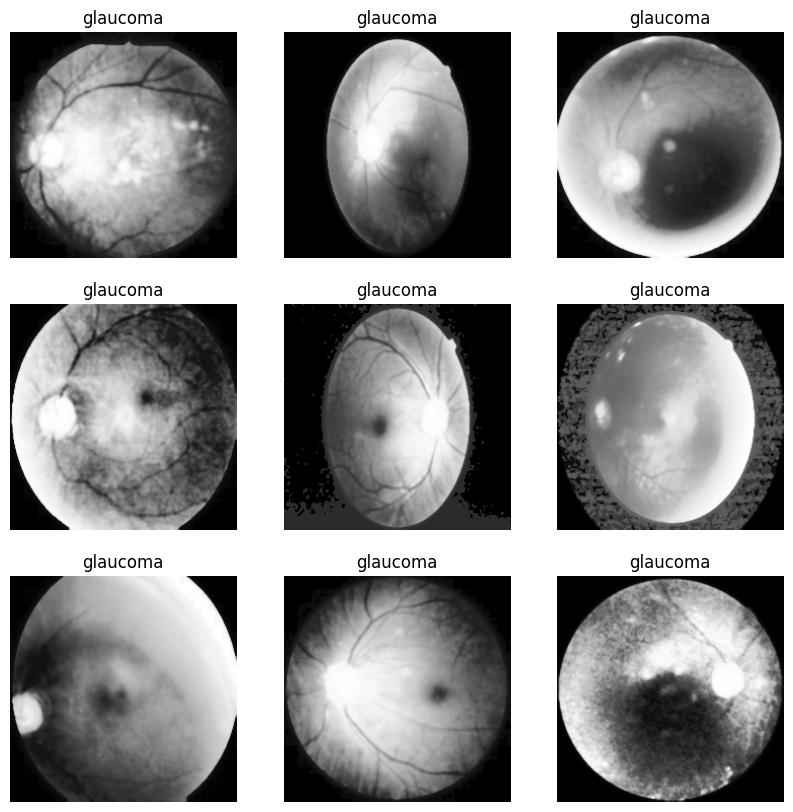

In [ ]:
plt.figure(figsize=(10, 10))#creatingg a new figure of size 10*10
for i in range(min(9, len(images_batch))):
    plt.subplot(3, 3, i + 1)#images are arranged in 3*3 matrix form
    plt.imshow(images_batch[i], cmap='gray')#image displayed on grayscale
    plt.title(labels_batch[i])#displays label as same as image label
    plt.axis('off')#hiding the axes
plt.show()

In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

Saving _1_7703314.jpg to _1_7703314.jpg


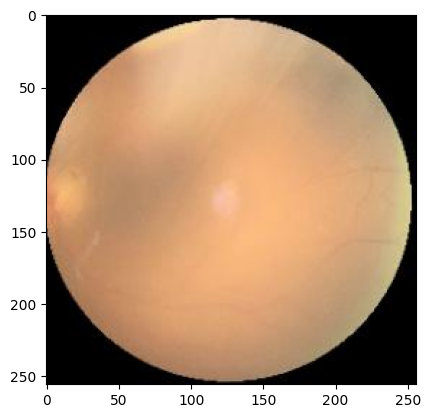

In [ ]:
from google.colab import files

uploaded = files.upload()
image_path = next(iter(uploaded))
image = plt.imread(image_path) #reading the image file into a array
image.shape # for image shape
plt.imshow(image) #displaying the loaded image

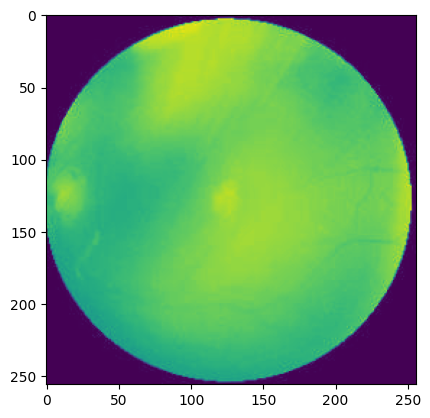

In [ ]:
gray = rgb2gray(image)
plt.imshow(gray)#converting image to gray and printing it

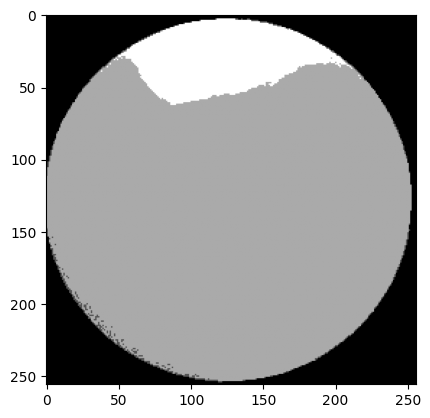

In [ ]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])# reshaping to 1d
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0#histogram quilization is aplied
gray = gray_r.reshape(gray.shape[0],gray.shape[1])#reshaping to 2d
plt.imshow(gray, cmap='gray')

In [ ]:
gray.shape#dimensions of image

(256, 256)

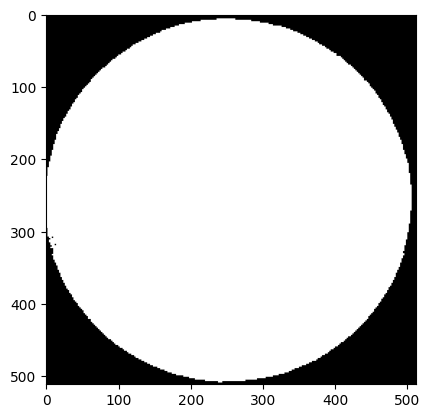

In [ ]:
gray = Image.fromarray(gray).resize((512, 512), Image.NEAREST)
gray = np.array(gray)

# Reshape the grayscale image to a 1D array
gray_r = gray.reshape(gray.shape[0] * gray.shape[1])

# Apply thresholding
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0

# Reshape back to the original dimensions
gray = gray_r.reshape(512, 512)

# Display the thresholded image
plt.imshow(gray, cmap='gray')
plt.show()

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(data ,t , test_size = 0.10 , shuffle = True , random_state = 10)

In [ ]:
print(f"x_train shape before reshaping: {np.array(x_train).shape}")
print(f"x_test shape before reshaping: {np.array(x_test).shape}")

x_train shape before reshaping: (3795, 256, 256, 3)
x_test shape before reshaping: (422, 256, 256, 3)


In [ ]:
x_train_resized = np.array([cv.resize(img, (224, 224)) for img in x_train])
x_test_resized = np.array([cv.resize(img, (224, 224)) for img in x_test])

In [ ]:
print(f"x_train shape after resizing: {x_train_resized.shape}")
print(f"x_test shape after resizing: {x_test_resized.shape}")

x_train shape after resizing: (3795, 224, 224, 3)
x_test shape after resizing: (422, 224, 224, 3)


In [ ]:
import tensorflow.keras as keras

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

# Define input tensor
input_tensor = Input(shape=(224, 224, 3))

# Load the VGG16 model
modelVGG = VGG16(
    include_top=False,
    weights=None,  # We will load weights manually
    input_tensor=input_tensor
)

# Ensure the weight file exists
import os
if not os.path.exists('/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'):
    !wget https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5 -O /content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

# Load weights
modelVGG.load_weights('/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', by_name=False)


--2025-02-18 11:49:08--  https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58889256 (56M) [application/octet-stream]
Saving to: ‘/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5’

/content/vgg16_weig 100%[===================>]  56.16M   253MB/s    in 0.2s    

2025-02-18 11:49:09 (253 MB/s) - ‘/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [58889256/58889256]



In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Input

# Define the input tensor with the correct shape
input_tensor = Input(shape=(224, 224, 3))  # VGG16 expects 224x224x3 input

# Load the VGG16 model with custom weights
modelVGG = VGG16(
    include_top=False,
    weights=None,  # Set to None as you will load custom weights
    input_tensor=input_tensor
)

# Load custom weights into the model
modelVGG.load_weights('/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', by_name=True)


In [ ]:
for layer in modelVGG.layers:
    layer.trainable = False

In [ ]:
num_classes = 4
for (i,layer) in enumerate(modelVGG.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model,num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(4096, activation='relu')(top_model)
        top_model = Dropout(0.5, name='dropout_1')(top_model)
        top_model = Dense(4096, activation='relu')(top_model)
        top_model = Dense(4, activation='softmax')(top_model)
        return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
from keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
num_classes = 4
FC_Head = lw(modelVGG , num_classes)
model = Model(inputs = modelVGG.input, outputs = FC_Head)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       2,101,2

 Total params: 33,613,636 (128.23 MB)

 Trainable params: 18,898,948 (72.09 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras.optimizers import Adam # Import the Adam optimizer

model.compile(optimizer = Adam(learning_rate=0.0001) , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train_resized, y_train, epochs=10, validation_data=(x_test_resized, y_test), verbose=1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


119/119 ━━━━━━━━━━━━━━━━━━━━ 53s 326ms/step - accuracy: 0.6564 - loss: 0.9723 - val_accuracy: 0.8318 - val_loss: 0.4197
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 54s 191ms/step - accuracy: 0.8429 - loss: 0.4140 - val_accuracy: 0.8460 - val_loss: 0.4192
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 23s 196ms/step - accuracy: 0.8500 - loss: 0.4066 - val_accuracy: 0.8649 - val_loss: 0.4110
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 40s 187ms/step - accuracy: 0.8693 - loss: 0.3361 - val_accuracy: 0.8460 - val_loss: 0.3498
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 23s 196ms/step - accuracy: 0.8867 - loss: 0.2897 - val_accuracy: 0.8744 - val_loss: 0.3181
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 40s 185ms/step - accuracy: 0.9046 - loss: 0.2435 - val_accuracy: 0.8744 - val_loss: 0.3134
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 42s 192ms/step - accuracy: 0.9206 - loss: 0.2152 - val_accuracy: 0.8768 - val_loss: 0.3416
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - accuracy: 0.9239 - loss: 0.2094 - val

In [ ]:
loss,aac = model.evaluate(x_train_resized, y_train)

119/119 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - accuracy: 0.9688 - loss: 0.0939


In [ ]:
loss,aac = model.evaluate(x_test_resized, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.8807 - loss: 0.2981


In [ ]:
def names(number):
    if number==0:
        return "Cataract"
    elif number==1:
        return "Diabetic Retinopathy"
    elif number==2:
        return "Glaucoma"
    elif number==3:
        return "Normal"

In [ ]:
from matplotlib.pyplot import imshow
def Prediction(img):
    x = np.array(img.resize((224,224)))
    x = x.reshape(1,224,224,3)
    res = model.predict_on_batch(x)
    classification = np.argmax(res)
    imshow(img)
    print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_48']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


99.9998927116394% Confidence Diabetic Retinopathy


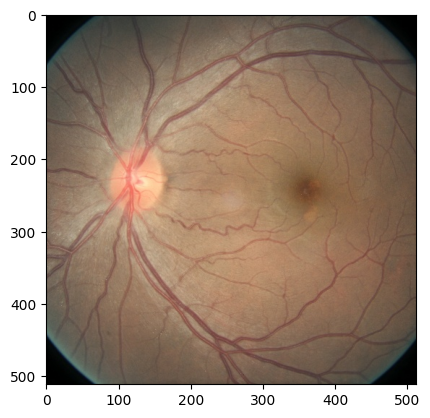

In [ ]:
img = Image.open(r"/content/dataset/diabetic_retinopathy/10009_right.jpeg")
Prediction(img)

99.92185831069946% Confidence Cataract


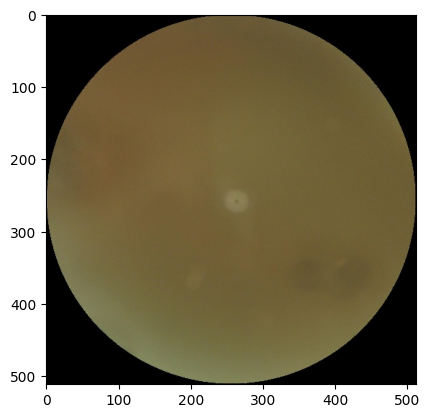

In [ ]:
img = Image.open(r"/content/dataset/cataract/0_left.jpg")
Prediction(img)

In [ ]:
model.save('model.h5')